In [1]:
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np
import warnings as wn
%load_ext autoreload
%autoreload 2
import esm2m.myfunctions as func

In [2]:
# z0 (k01) ensemble average
z0avgpath = '/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_k01_ensAvg_1950_2100.nc'
ds_avg = xr.open_dataset(z0avgpath)

In [3]:
rootdir = '/local/ss23/GFDL_LEs/'
experiment = 'OCN/METABOLIC_INDEX/RCP85'
filename = 'MI_hitemp_sens_k01_ens*_1x1_1950_2100.nc'
path = rootdir+experiment+'/'+filename
ds_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')

In [4]:
rootdir = '/local/ss23/GFDL_LEs/'
subdir = 'AREA_FILES_ETC'
filename_area = 'WOA2001_grid.nc'
path_area = rootdir+subdir+'/'+filename_area
area = xr.open_dataset(path_area)['AREA'].rename({'latitude':'yt_ocean','longitude':'xt_ocean'})
area = area.assign_coords({'xt_ocean':ds_avg['xt_ocean'],'yt_ocean':ds_avg['yt_ocean']})
oceanmask = np.isfinite(ds_avg['MI'].isel(time=0).squeeze())
area_masked = area.where(oceanmask,np.nan)
ds_total = ~np.isnan(area.where(oceanmask))
total = ds_total.sum(dim='xt_ocean').sum(dim='yt_ocean')

SPATIAL MAPS

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


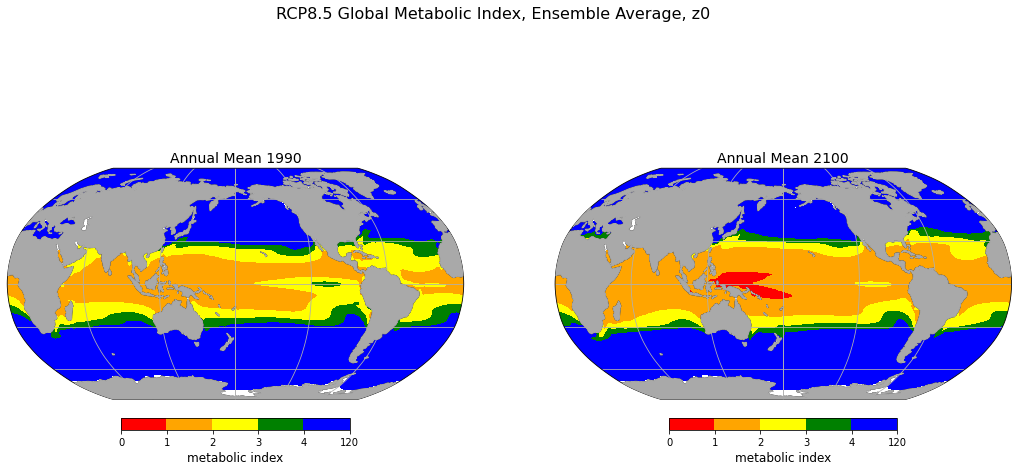

In [4]:
fig, (ax0, ax1) = plt.subplots(figsize=(18,7), ncols=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Global Metabolic Index, Ensemble Average, z0', fontsize=16)
func.graph(ds_avg, ax0, 'Annual Mean 1990', 1990, None, False)
func.graph(ds_avg, ax1, 'Annual Mean 2100', 2100, None, False)

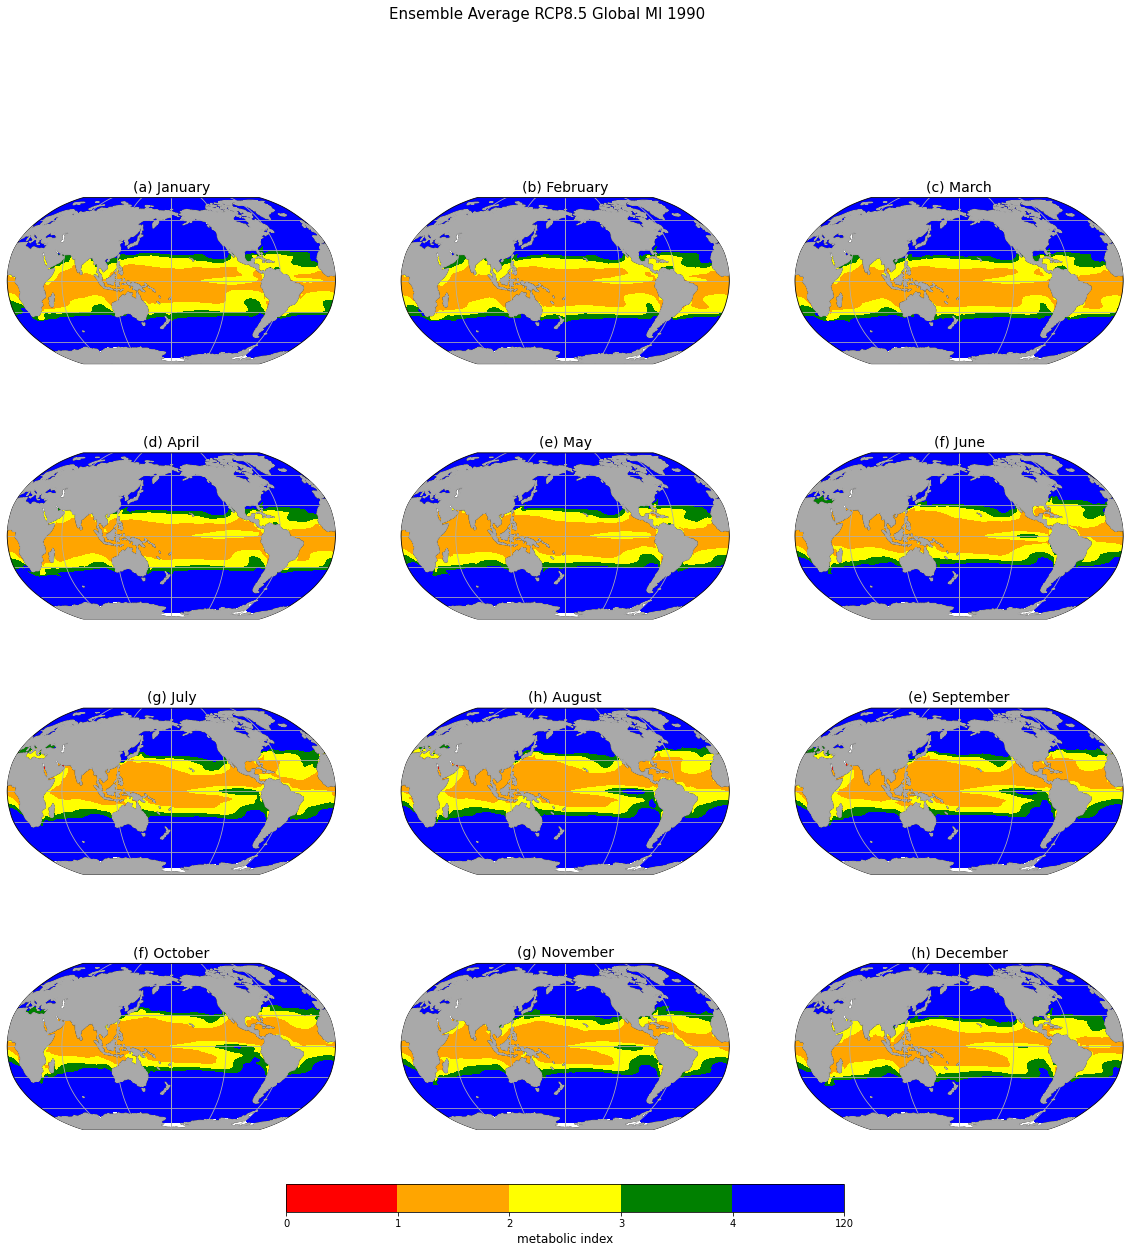

In [5]:
func.months_of_year(ds_avg, '1990', 'Ensemble Average RCP8.5 Global MI 1990')

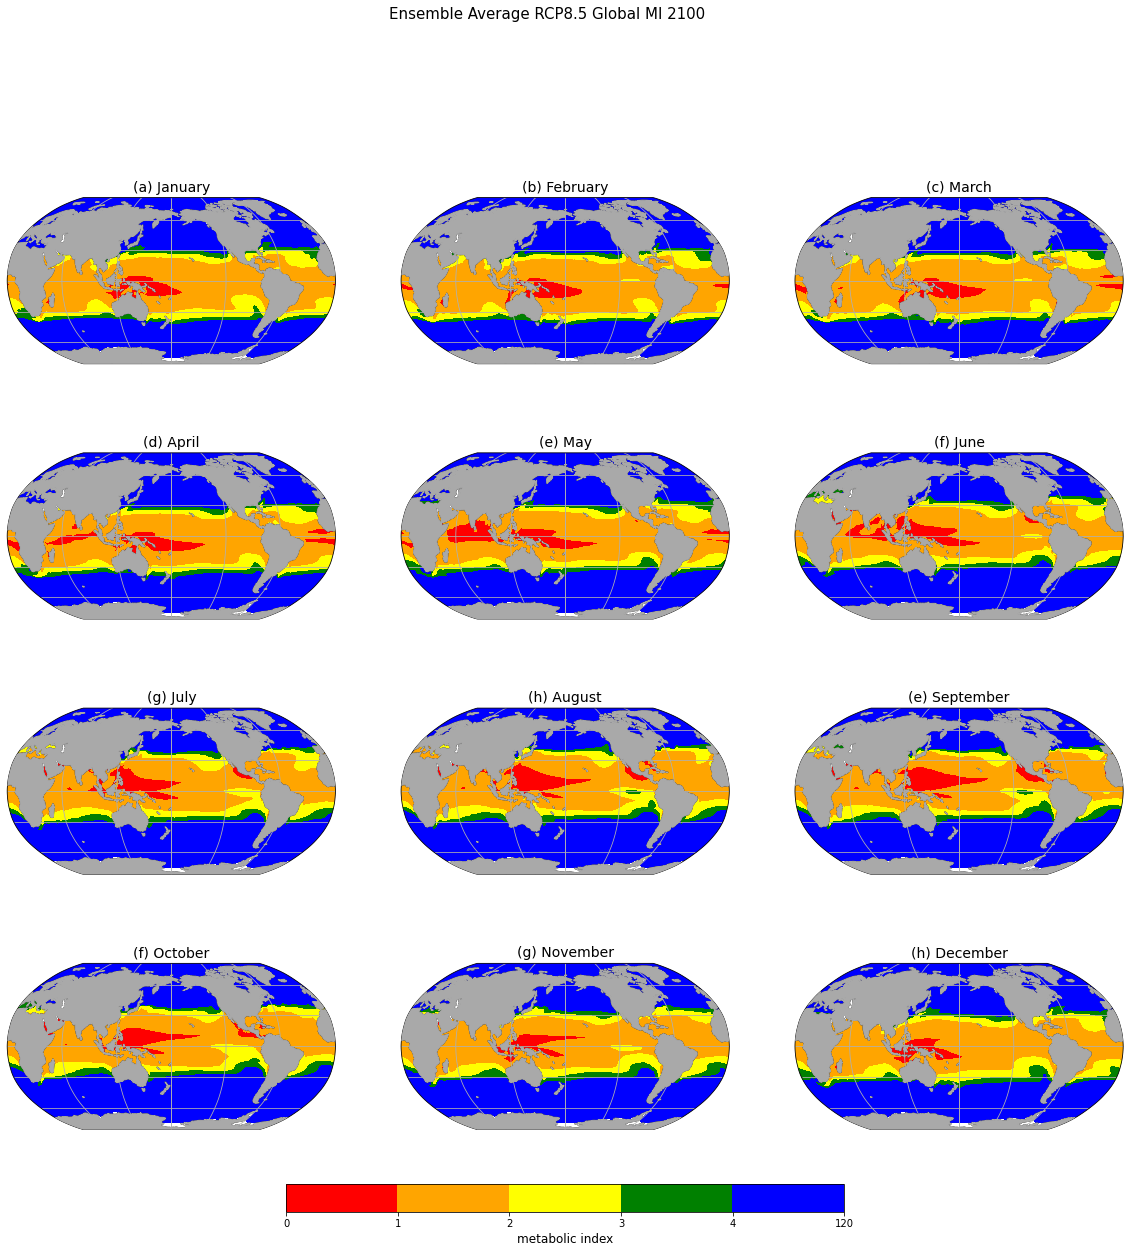

In [6]:
func.months_of_year(ds_avg, '2100', 'Ensemble Average RCP8.5 Global MI 2100')

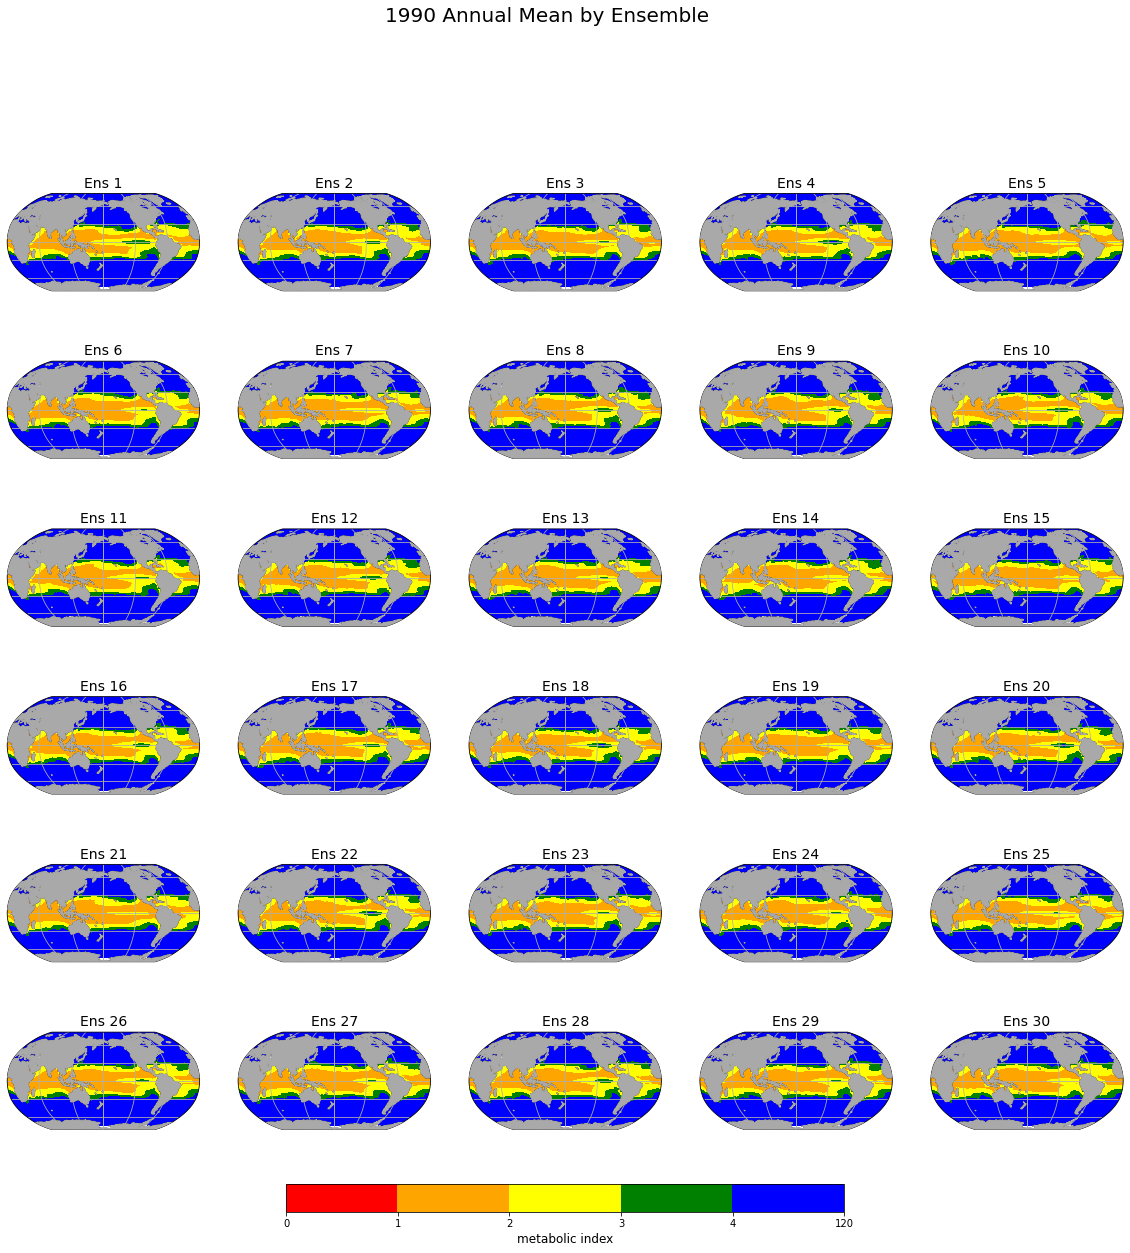

In [7]:
func.graph_ens(ds_all, '1990 Annual Mean by Ensemble', 1990, None)

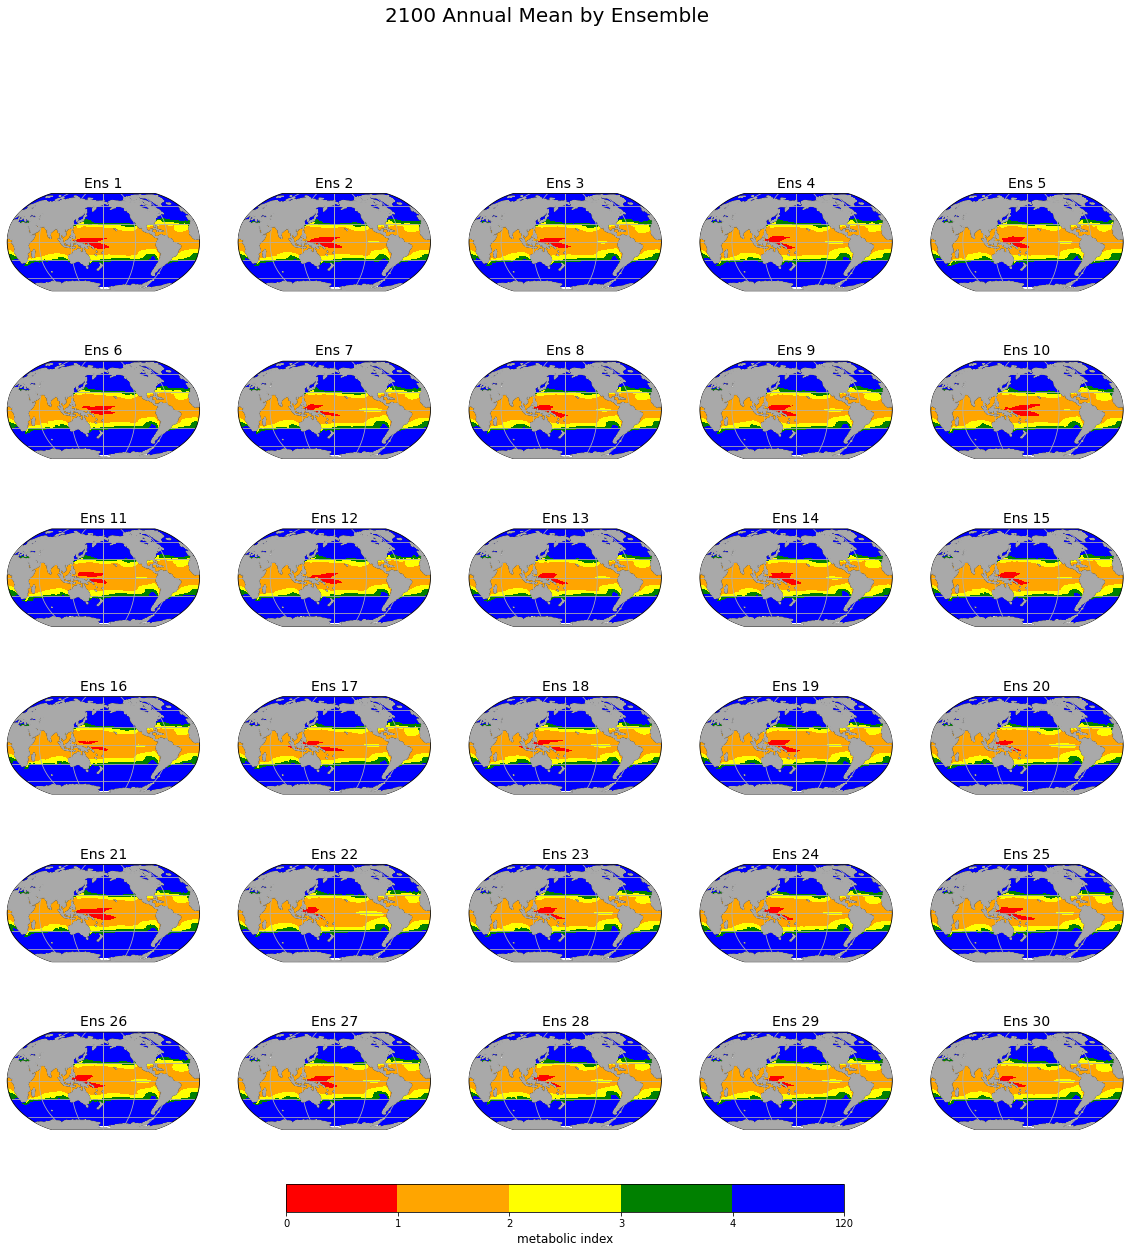

In [8]:
func.graph_ens(ds_all, '2100 Annual Mean by Ensemble', 2100, None)

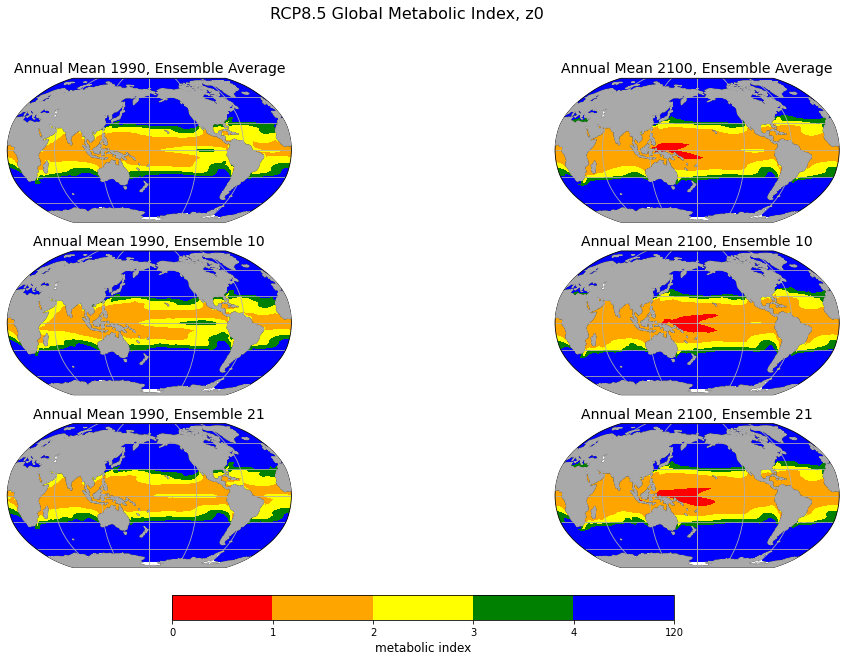

In [38]:
fig, axs = plt.subplots(figsize=(18,10),nrows=3,ncols=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Global Metabolic Index, z0', fontsize=16)
func.graph(ds_avg, axs[0,0], 'Annual Mean 1990, Ensemble Average', 1990, None, True)
func.graph(ds_avg, axs[0,1], 'Annual Mean 2100, Ensemble Average', 2100, None, True)
func.graph(ds_all.sel(ensemble=9), axs[1,0], 'Annual Mean 1990, Ensemble 10', 1990, None, True)
func.graph(ds_all.sel(ensemble=9), axs[1,1], 'Annual Mean 2100, Ensemble 10', 2100, None, True)
func.graph(ds_all.sel(ensemble=20), axs[2,0], 'Annual Mean 1990, Ensemble 21', 1990, None, True)
im = func.graph(ds_all.sel(ensemble=20), axs[2,1], 'Annual Mean 2100, Ensemble 21', 2100, None, True)
cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('metabolic index',fontsize=12)

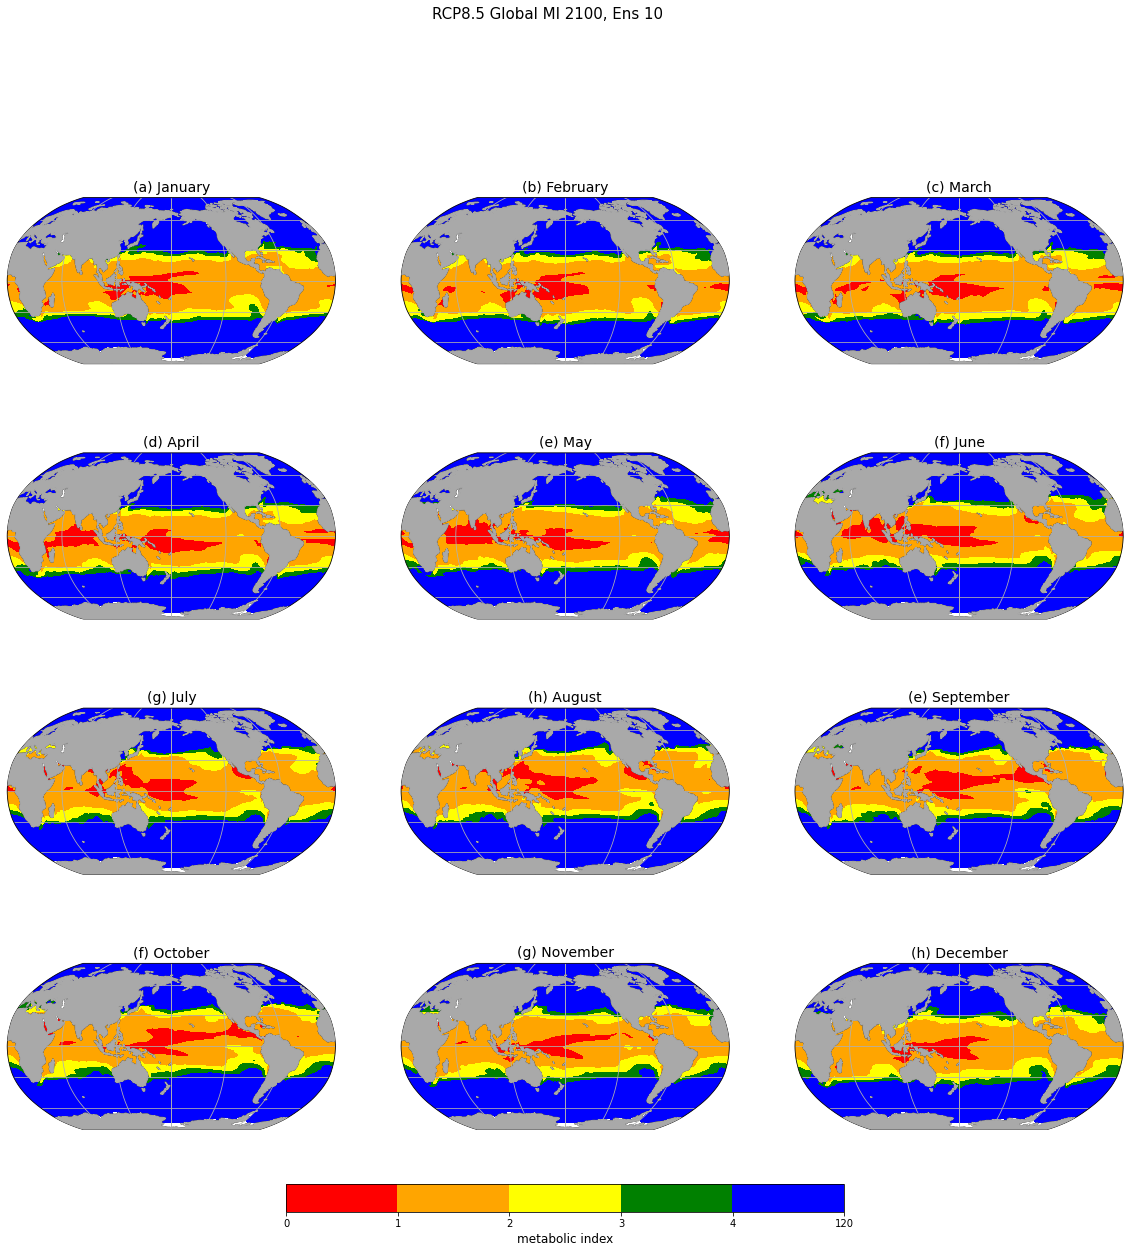

In [10]:
func.months_of_year(ds_all.sel(ensemble=9), '2100', 'RCP8.5 Global MI 2100, Ens 10')

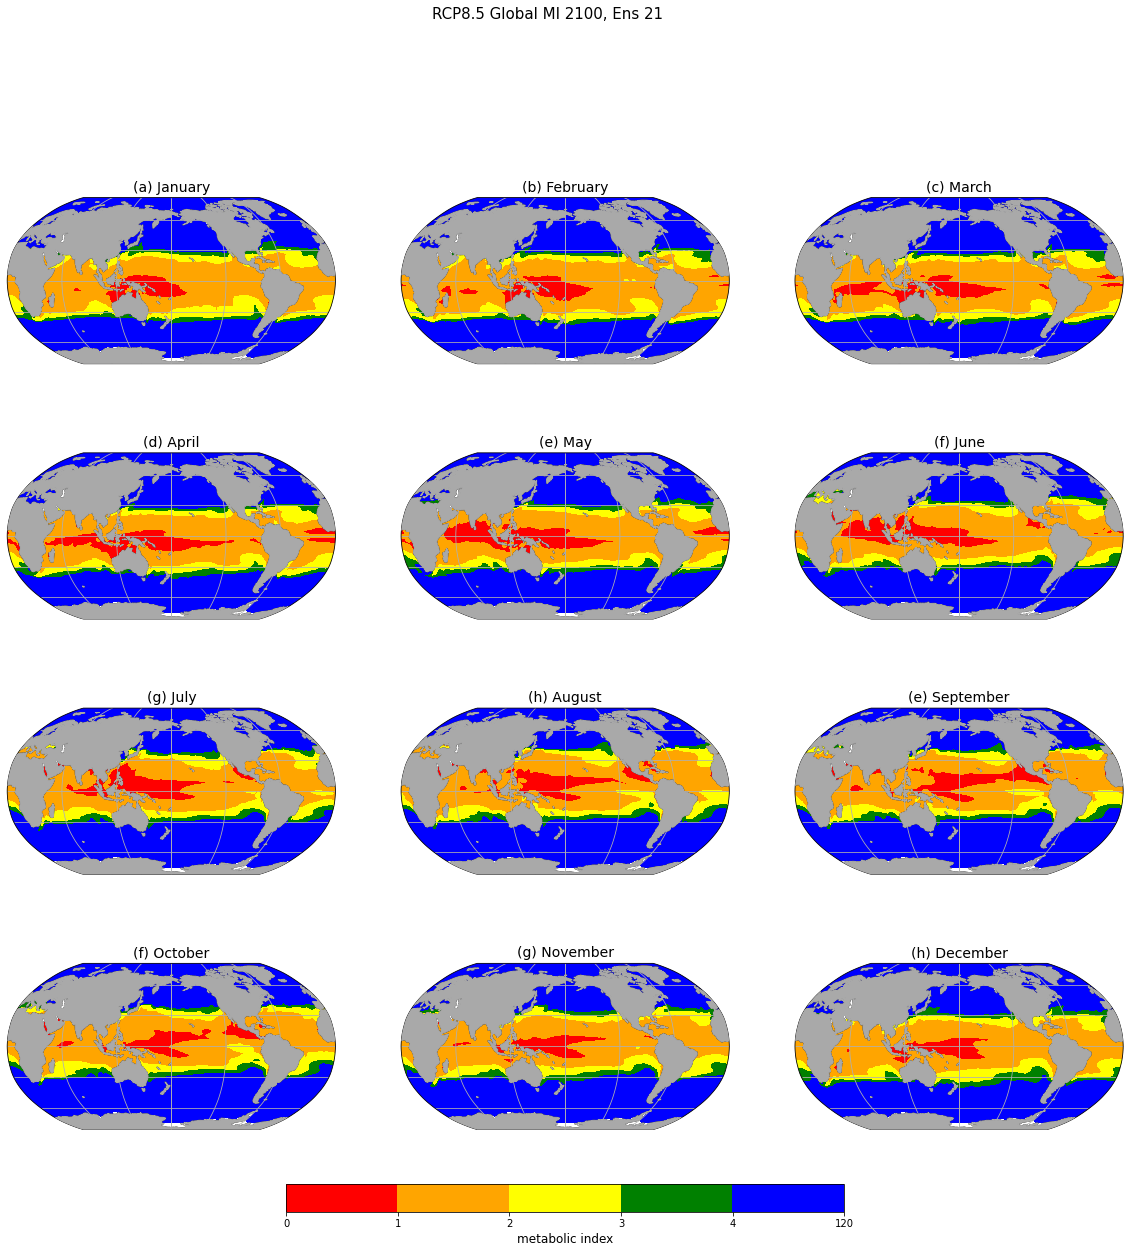

In [11]:
func.months_of_year(ds_all.sel(ensemble=20), '2100', 'RCP8.5 Global MI 2100, Ens 21')

TIME SERIES

In [5]:
z0_red = func.get_red(ds_all, total)
z0_orange = func.get_orange(ds_all, total)
z0_yellow = func.get_yellow(ds_all, total)

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/home/aos/ystochel/miniconda3/envs/

(-2.0, 42.0)

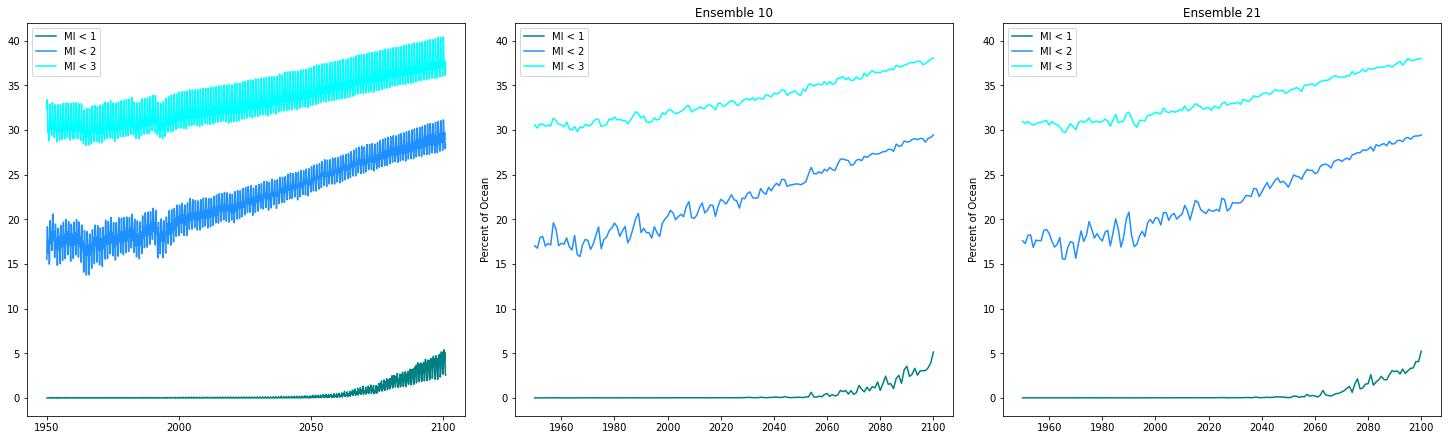

In [8]:
fig, (ax0,ax1,ax2) = plt.subplots(figsize=(20,6),ncols=3,constrained_layout=True)
ax0.plot(z0_red['time'],z0_red,color='teal',label='MI < 1')
ax0.plot(z0_orange['time'],z0_orange,color='dodgerblue',label='MI < 2')
ax0.plot(z0_yellow['time'],z0_yellow,color='cyan',label='MI < 3')
ax0.legend()
# func.percent_plot(ds_avg, ax0, 'Ensemble Average', True, True, True, None, None, 'k01', total)
ax0.set_ylim(-2,42)
func.percent_plot(ds_all.sel(ensemble=9), ax1, 'Ensemble 10', True, True, True, None, None, 'k01', total)
ax1.set_ylim(-2,42)
func.percent_plot(ds_all.sel(ensemble=20), ax2, 'Ensemble 21', True, True, True, None, None, 'k01', total)
ax2.set_ylim(-2,42)

(27.0, 41.0)

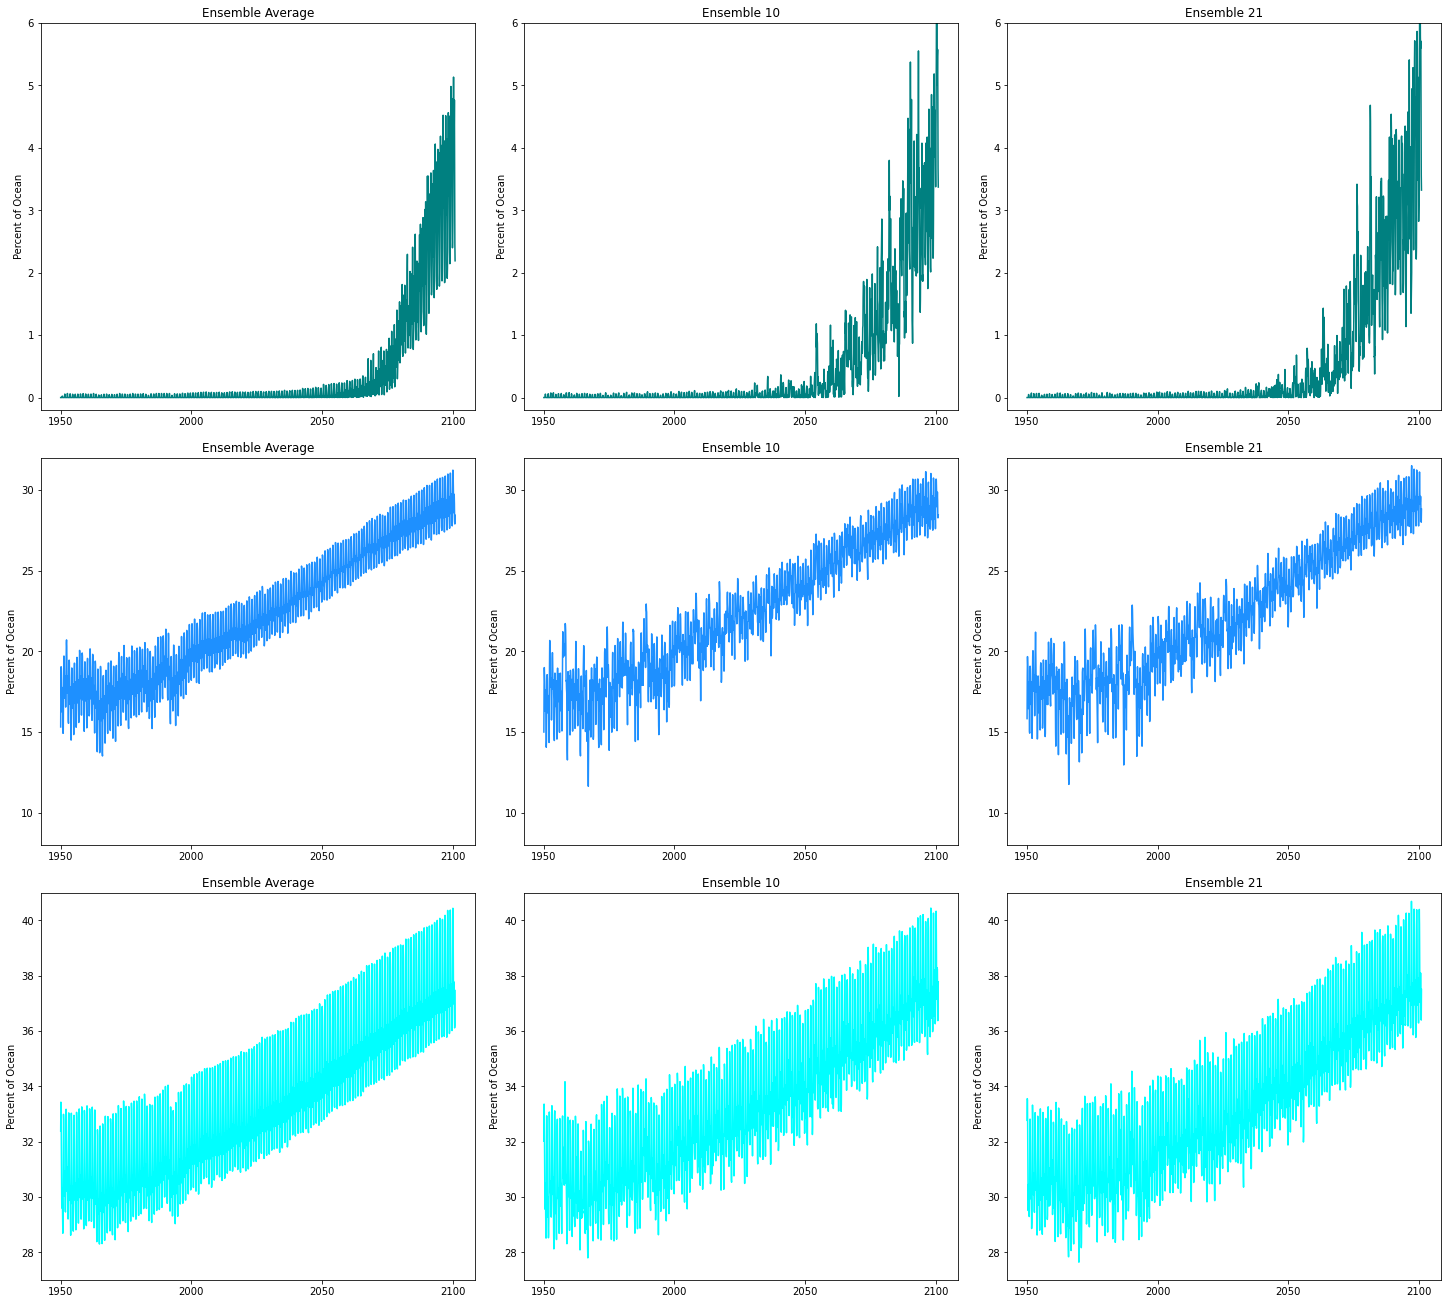

In [32]:
fig, axs = plt.subplots(figsize=(20,18),ncols=3,nrows=3,constrained_layout=True)
func.percent_plot(ds_avg, axs[0,0], 'Ensemble Average', True, False, False, None, None, 'k01', total)
func.percent_plot(ds_all.sel(ensemble=9), axs[0,1], 'Ensemble 10', True, False, False, None, None, 'k01', total)
func.percent_plot(ds_all.sel(ensemble=20), axs[0,2], 'Ensemble 21', True, False, False, None, None, 'k01', total)
func.percent_plot(ds_avg, axs[1,0], 'Ensemble Average', False, True, False, None, None, 'k01', total)
axs[1,0].set_ylim(8,32)
func.percent_plot(ds_all.sel(ensemble=9), axs[1,1], 'Ensemble 10', False, True, False, None, None, 'k01', total)
axs[1,1].set_ylim(8,32)
func.percent_plot(ds_all.sel(ensemble=20), axs[1,2], 'Ensemble 21', False, True, False, None, None, 'k01', total)
axs[1,2].set_ylim(8,32)
func.percent_plot(ds_avg, axs[2,0], 'Ensemble Average', False, False, True, None, None, 'k01', total)
axs[2,0].set_ylim(27,41)
func.percent_plot(ds_all.sel(ensemble=9), axs[2,1], 'Ensemble 10', False, False, True, None, None, 'k01', total)
axs[2,1].set_ylim(27,41)
func.percent_plot(ds_all.sel(ensemble=20), axs[2,2], 'Ensemble 21', False, False, True, None, None, 'k01', total)
axs[2,2].set_ylim(27,41)

(-0.5, 9.0)

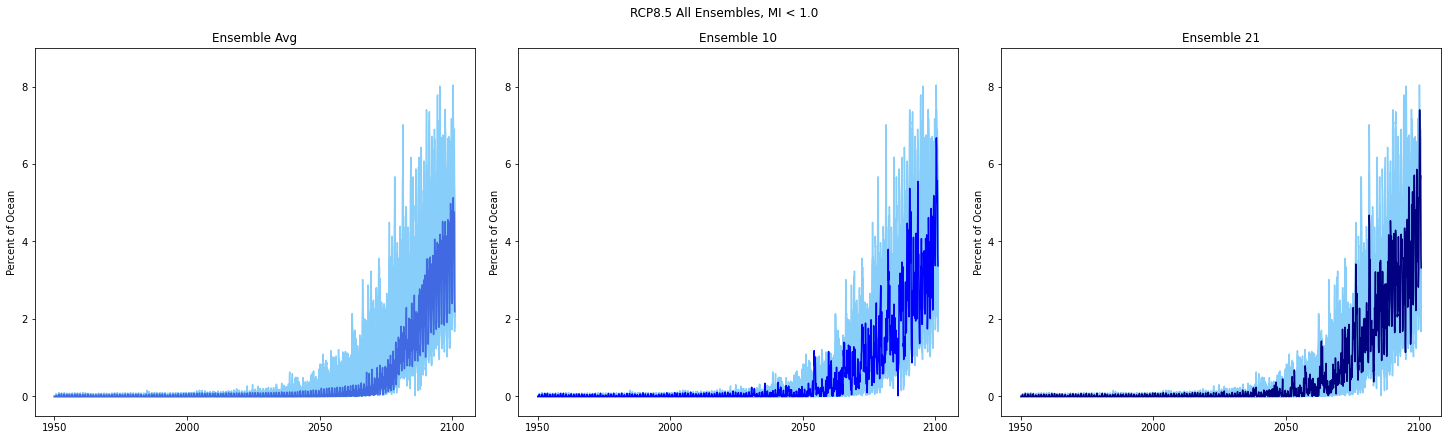

In [30]:
ens = np.arange(0,30,1)
fig, (ax0,ax1,ax2) = plt.subplots(figsize=(20,6),ncols=3,constrained_layout=True)
fig.suptitle('RCP8.5 All Ensembles, MI < 1.0')
wn.filterwarnings('ignore')
for mem in ens:
    func.percent_plot(ds_all.sel(ensemble=mem),ax0,'Ensemble Avg',True,False,False,'lightskyblue',None,'k01', total)
func.percent_plot(ds_avg,ax0,'Ensemble Avg',True,False,False,'royalblue','Ens Avg','k01', total)
ax0.set_ylim(-0.5, 9)
for mem in ens:
    func.percent_plot(ds_all.sel(ensemble=mem),ax1,'Ensemble 10',True,False,False,'lightskyblue',None,'k01', total)
func.percent_plot(ds_all.sel(ensemble=9),ax1,'Ensemble 10',True,False,False,'blue','Ens 10','k01', total)
ax1.set_ylim(-0.5, 9)
for mem in ens:
    func.percent_plot(ds_all.sel(ensemble=mem),ax2,'Ensemble 21',True,False,False,'lightskyblue',None,'k01', total)
func.percent_plot(ds_all.sel(ensemble=20),ax2,'Ensemble 21',True,False,False,'navy','Ens 21','k01', total)
ax2.set_ylim(-0.5, 9)

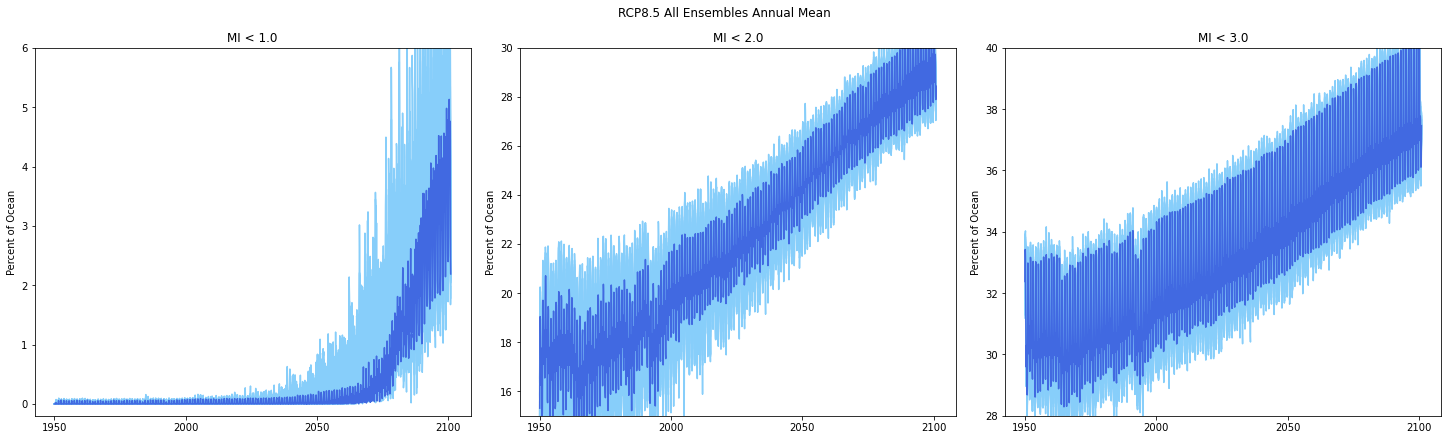

In [27]:
ens = np.arange(0,30,1)
fig, (ax0,ax1,ax2) = plt.subplots(figsize=(20,6),ncols=3,constrained_layout=True)
fig.suptitle('RCP8.5 All Ensembles Annual Mean')
wn.filterwarnings('ignore')
for mem in ens:
    func.percent_plot(ds_all.sel(ensemble=mem),ax0,'MI < 1.0',True,False,False,'lightskyblue',None,'k01', total)
func.percent_plot(ds_avg,ax0,'MI < 1.0',True,False,False,'royalblue','Ens Avg','k01', total)
for mem in ens:
    func.percent_plot(ds_all.sel(ensemble=mem),ax1,'MI < 2.0',False,True,False,'lightskyblue',None,'k01', total)
func.percent_plot(ds_avg,ax1,'MI < 2.0',False,True,False,'royalblue','Ens Avg','k01', total)
for mem in ens:
    func.percent_plot(ds_all.sel(ensemble=mem),ax2,'MI < 3.0',False,False,True,'lightskyblue',None,'k01', total)
func.percent_plot(ds_avg,ax2,'MI < 3.0',False,False,True,'royalblue','Ens Avg','k01', total)

(-0.5, 41.0)

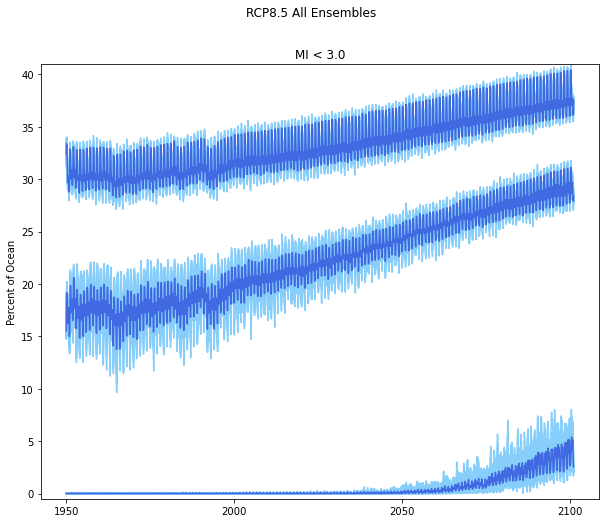

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
ens = np.arange(0,30,1)
fig.suptitle('RCP8.5 All Ensembles')
wn.filterwarnings('ignore')
for mem in ens:
    func.percent_plot(ds_all.sel(ensemble=mem),ax,'MI < 1.0',True,False,False,'lightskyblue','MI < 1.0','k01', total)
ax.plot(z0_red['time'],z0_red,color='royalblue')
# func.percent_plot(ds_avg,ax,'RCP8.5 All Ensembles',True,False,False,'royalblue','Ens Avg','k01', total)
for mem in ens:
    func.percent_plot(ds_all.sel(ensemble=mem),ax,'MI < 2.0',False,True,False,'lightskyblue','MI < 2.0','k01', total)
# func.percent_plot(ds_avg,ax,'RCP8.5 All Ensembles',False,True,False,'royalblue','Ens Avg','k01', total)
ax.plot(z0_orange['time'],z0_orange,color='royalblue')
for mem in ens:
    func.percent_plot(ds_all.sel(ensemble=mem),ax,'MI < 3.0',False,False,True,'lightskyblue','MI < 3.0','k01', total)
ax.plot(z0_yellow['time'],z0_yellow,color='royalblue')
# func.percent_plot(ds_avg,ax,'RCP8.5 All Ensembles',False,False,True,'royalblue','Ens Avg','k01', total)
ax.set_ylim(-0.5, 41)

In [ ]:
REGIONAL ANALYSES